# Coordinate alignment between multi-slices

This notebook demonstrates the process of Aligning spatial transcriptome data. This is done in the following two steps.

1. Align spatial transcriptome data from a set of multi-slices;
2. Align spatial transcriptome data from two sets of multi-slices simultaneously.
3. Reduce the amount of data by sampling to improve alignment speed.

 Here we modified a published method PASTE, which utilized Fused Gromov-Wasserstein Optimal Transport (FGW-OT) algorithm, to leverages
 both gene expression similarity and spatial distances between spots to align and integrate spatial transcriptomics data.

 **Reference**: Ron Zeira, Max Land, Benjamin J. Raphael. Alignment and Integration of Spatial Transcriptomics Data. bioRxiv, 2021.03.16.435604.
                doi: https://doi.org/10.1101/2021.03.16.435604

## Packages

In [2]:
import math
import os
import sys

import pandas as pd

sys.path.insert(0, "/home/yao/PythonProject/Yao_packages/spateo-release")

import spateo as st

/home/yao/anaconda3/envs/BGIpy38_tf2/lib/python3.8/site-packages/spaghetti/network.py:36: FutureWarning:

The next major release of pysal/spaghetti (2.0.0) will drop support for all ``libpysal.cg`` geometries. This change is a first step in refactoring ``spaghetti`` that is expected to result in dramatically reduced runtimes for network instantiation and operations. Users currently requiring network and point pattern input as ``libpysal.cg`` geometries should prepare for this simply by converting to ``shapely`` geometries.



|-----> setting visualization default mode in dynamo. Your customized matplotlib settings might be overritten.


## Data source

In [3]:
sample_id = "E4-8_g"

# cellbin data
cellbin_folder = f"/media/yao/Yao/Projects/Project_drosophila_version2/Data/{sample_id}/1_segmentation/cellbin_h5ad"
cellbin_files = [filename for root1, dirs1, files1 in os.walk(cellbin_folder) for filename in files1][:10]
cellbin_slices = [st.read_h5ad(os.path.join(cellbin_folder, slices1_file)) for slices1_file in cellbin_files]

# binning data
binning_folder = f"/media/yao/Yao/Projects/Project_drosophila_version2/Data/{sample_id}/1_segmentation/bin20_h5ad"
binning_files = [filename for root2, dirs2, files2 in os.walk(binning_folder) for filename in files2][:10]
binning_slices = [st.read_h5ad(os.path.join(binning_folder, slices2_file)) for slices2_file in binning_files]

## Align spatial transcriptome data from a set of multi-slices

#### Slices alignment

In [4]:
cellbin_slices_sample = [slice.copy() for slice in cellbin_slices]
align_cellbin_slices = st.tl.models_align(models=cellbin_slices_sample, spatial_key="spatial", key_added="align_spatial",
                                          numItermax=200, numItermaxEmd=500000, device="0")

|-----> [Models alignment] in progress: 11.1111%|-----------> Filtered all samples for common genes. There are 6326 common genes.
|-----> [Models alignment] in progress: 22.2222%|-----------> Filtered all samples for common genes. There are 7661 common genes.
|-----> [Models alignment] in progress: 33.3333%|-----------> Filtered all samples for common genes. There are 8095 common genes.
|-----> [Models alignment] in progress: 44.4444%|-----------> Filtered all samples for common genes. There are 8630 common genes.
|-----> [Models alignment] in progress: 55.5556%|-----------> Filtered all samples for common genes. There are 7874 common genes.
|-----> [Models alignment] in progress: 66.6667%|-----------> Filtered all samples for common genes. There are 7728 common genes.
|-----> [Models alignment] in progress: 77.7778%|-----------> Filtered all samples for common genes. There are 8344 common genes.
|-----> [Models alignment] in progress: 88.8889%|-----------> Filtered all samples for com

#### Visualization slices based on aligned coordinates

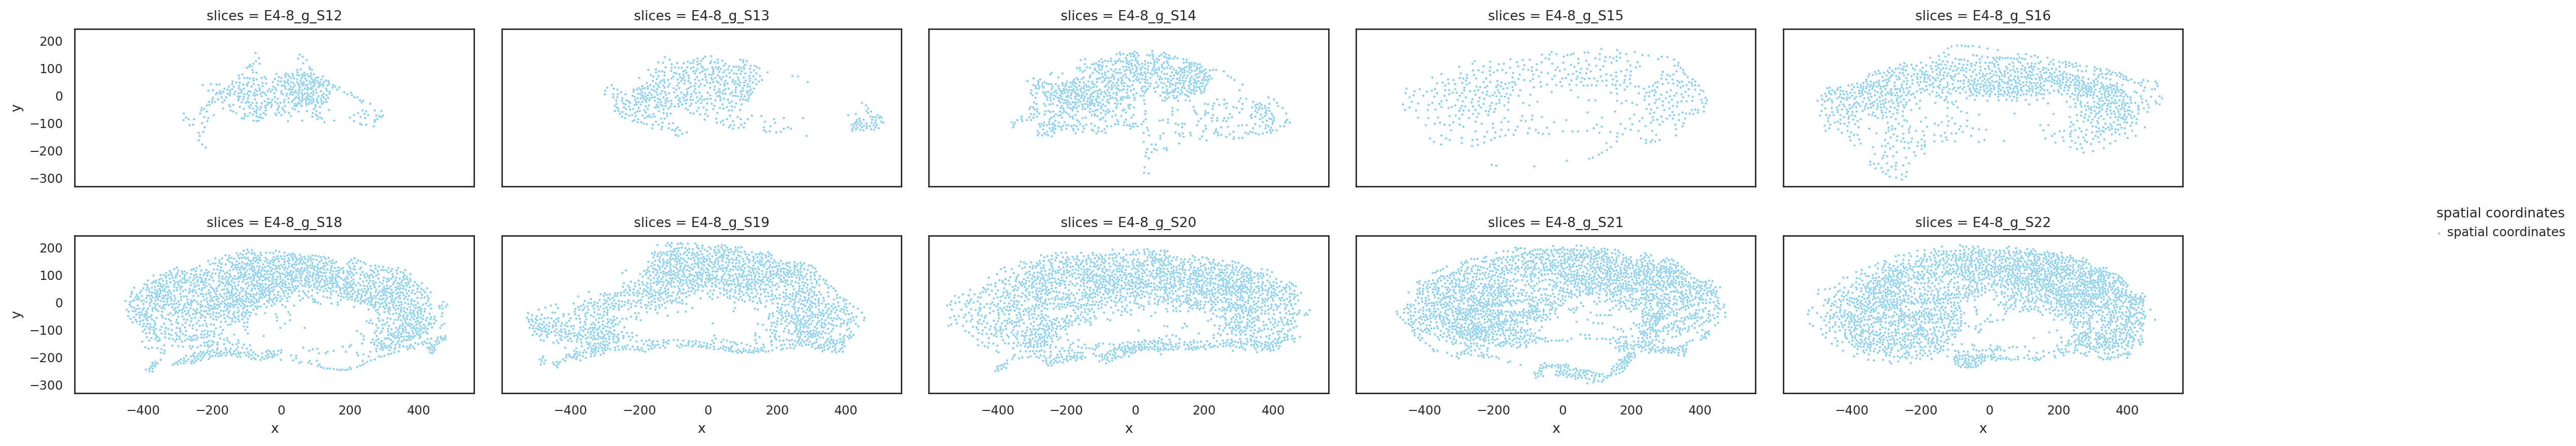

In [5]:
st.pl.multi_slices(
    slices=align_cellbin_slices.copy(),
    slices_key="slices",
    label=None,
    spatial_key="align_spatial",
    layer="X",
    ncol=5,
    ax_height=1,
)

## Align spatial transcriptome data from two sets of multi-slices simultaneously

#### Slices alignment

In [6]:
cellbin_slices_sample = [slice.copy() for slice in cellbin_slices]
binning_slices_sample = [slice.copy() for slice in binning_slices]
align_cellbin_slices, align_binning_slices = st.tl.models_align_ref(
    models=cellbin_slices_sample, models_ref=binning_slices_sample, spatial_key="spatial",
    key_added="align_spatial", numItermax=500, numItermaxEmd=100000, device="0"
)

|-----> [Models alignment] in progress: 11.1111%|-----------> Filtered all samples for common genes. There are 6326 common genes.
|-----> [Models alignment] in progress: 22.2222%|-----------> Filtered all samples for common genes. There are 7661 common genes.
|-----> [Models alignment] in progress: 33.3333%|-----------> Filtered all samples for common genes. There are 8095 common genes.
|-----> [Models alignment] in progress: 44.4444%|-----------> Filtered all samples for common genes. There are 8630 common genes.
|-----> [Models alignment] in progress: 55.5556%|-----------> Filtered all samples for common genes. There are 7874 common genes.
|-----> [Models alignment] in progress: 66.6667%|-----------> Filtered all samples for common genes. There are 7728 common genes.
|-----> [Models alignment] in progress: 77.7778%|-----------> Filtered all samples for common genes. There are 8344 common genes.
|-----> [Models alignment] in progress: 88.8889%|-----------> Filtered all samples for com

#### Visualization slices based on align coordinates

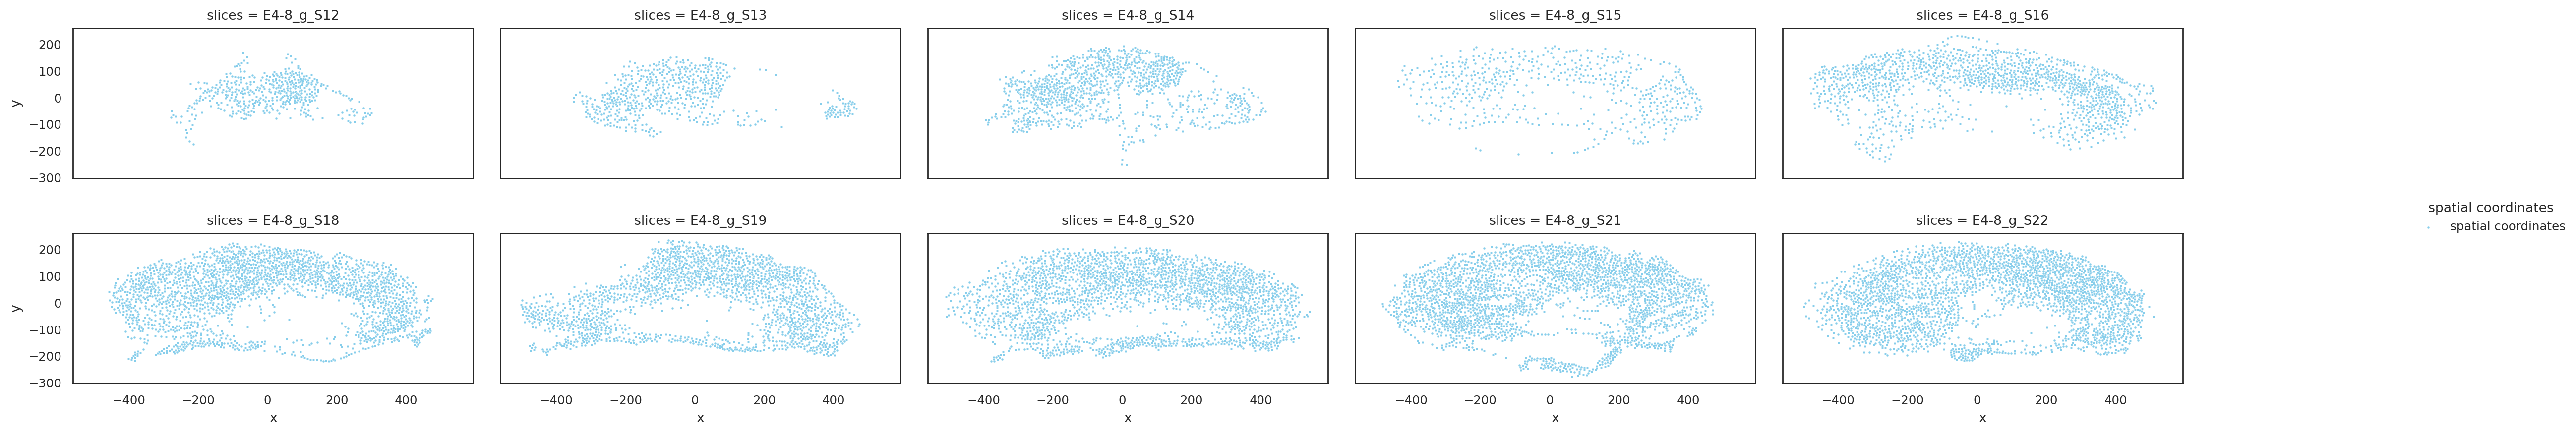

In [8]:
st.pl.multi_slices(
    slices=align_cellbin_slices.copy(),
    slices_key="slices",
    label=None,
    spatial_key="align_spatial",
    layer="X",
    ncol=5,
    ax_height=1,
)

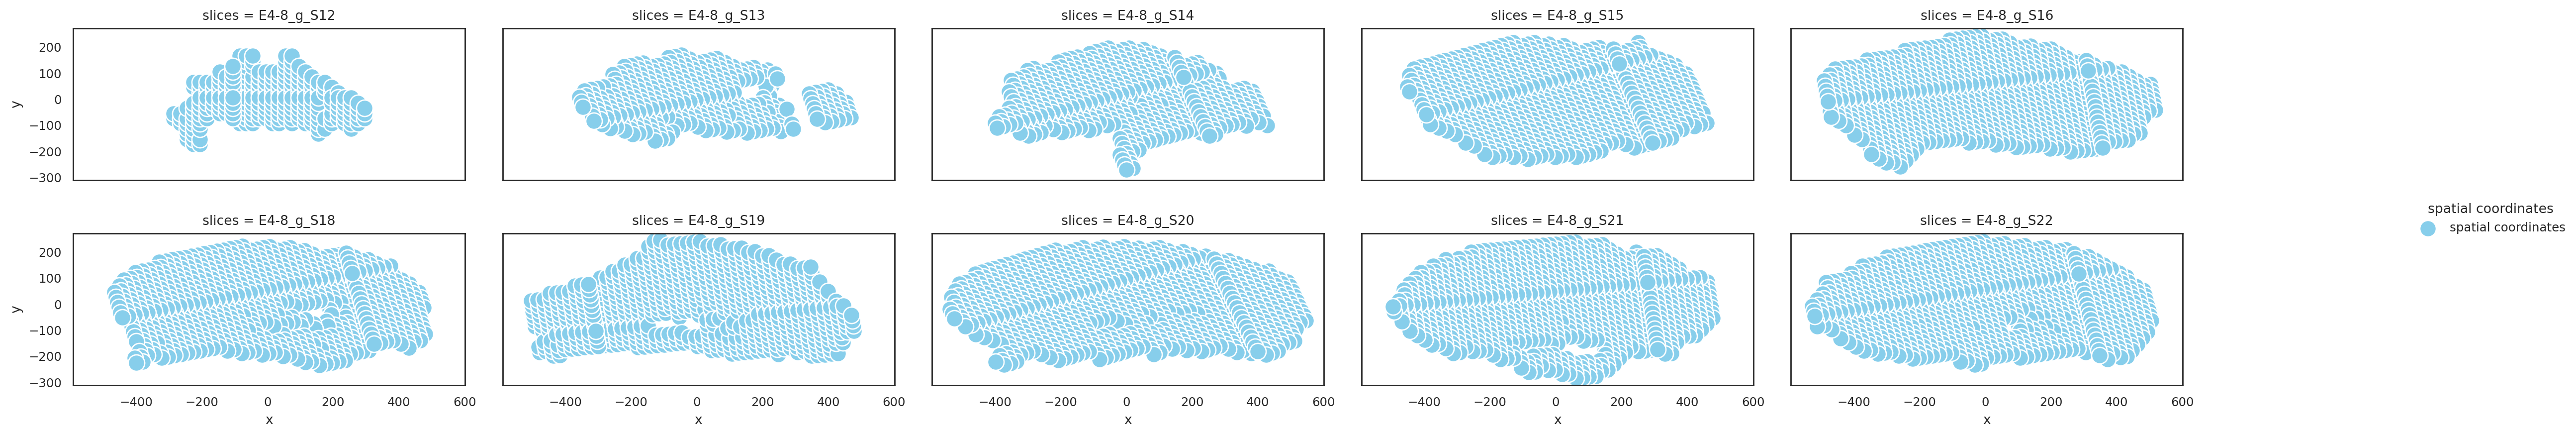

In [13]:
st.pl.multi_slices(
    slices=align_binning_slices.copy(),
    slices_key="slices",
    label=None,
    spatial_key="align_spatial",
    layer="X",
    ncol=5,
    ax_height=1,
)

## Reduce the amount of data by sampling to improve alignment speed

#### Slices alignment

In [7]:
cellbin_slices_sample = [slice.copy() for slice in cellbin_slices]
align_cellbin_slices, _ = st.tl.models_align_ref(
    models=cellbin_slices_sample, models_ref=None, n_sampling=200, sampling_method="random", spatial_key="spatial",
    key_added="align_spatial", numItermax=500, numItermaxEmd=100000, device="0"
)

|-----> [Models alignment] in progress: 11.1111%|-----------> Filtered all samples for common genes. There are 6326 common genes.
|-----> [Models alignment] in progress: 22.2222%|-----------> Filtered all samples for common genes. There are 7661 common genes.
|-----> [Models alignment] in progress: 33.3333%|-----------> Filtered all samples for common genes. There are 8095 common genes.
|-----> [Models alignment] in progress: 44.4444%|-----------> Filtered all samples for common genes. There are 8630 common genes.
|-----> [Models alignment] in progress: 55.5556%|-----------> Filtered all samples for common genes. There are 7874 common genes.
|-----> [Models alignment] in progress: 66.6667%|-----------> Filtered all samples for common genes. There are 7728 common genes.
|-----> [Models alignment] in progress: 77.7778%|-----------> Filtered all samples for common genes. There are 8344 common genes.
|-----> [Models alignment] in progress: 88.8889%|-----------> Filtered all samples for com

#### Visualization slices based on align coordinates

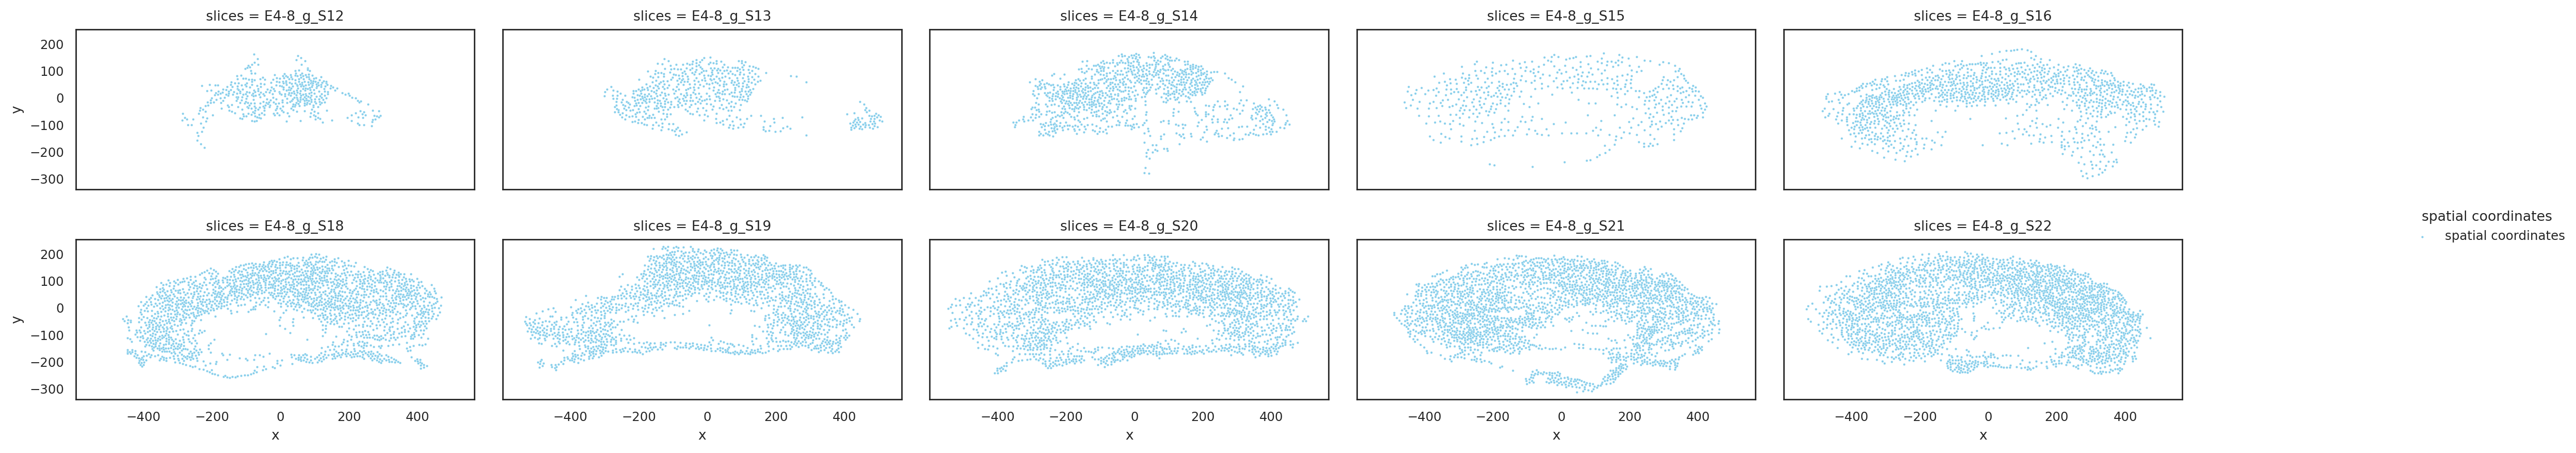

In [8]:
st.pl.multi_slices(
    slices=align_cellbin_slices.copy(),
    slices_key="slices",
    label=None,
    spatial_key="align_spatial",
    layer="X",
    ncol=5,
    ax_height=1,
)